In [2]:
import sys
sys.path.append('..')
sys.path.append('../src')
sys.path.append('../data')

# from src.ablate_heads import Ablate, AblateMultiLen, OVCircuit
from src.experiment import AblateMultiLen, OVCircuit, AttentionPattern
from src.dataset import TlensDataset  # noqa: E402
# from src.dataset import MyDataset
from src.model import WrapHookedTransformer

from src.myplot import plot_heatmaps, barplot_head
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import einops

torch.set_grad_enabled(False)
%load_ext autoreload
%autoreload 2

SyntaxError: invalid syntax (ablate.py, line 524)

In [2]:
model = WrapHookedTransformer.from_pretrained("gpt2", device="cuda", refactor_factored_attn_matrices=False)
dataset = TlensDataset("../data/full_data_sampled_gpt2.json", model, slice=5000)

Using pad_token, but it is not set yet.


Loaded pretrained model gpt2 into HookedTransformer
Dataset loaded from ../data/full_data_sampled_gpt2.json
Number of samples: 5000


In [ ]:
ablate_multi = AblateMultiLen(dataset, model, 40)
examples_mem, examples_cp = ablate_multi.ablate_multi_len(ablate_target="head", return_type="diff")

<Axes: ylabel='Count'>

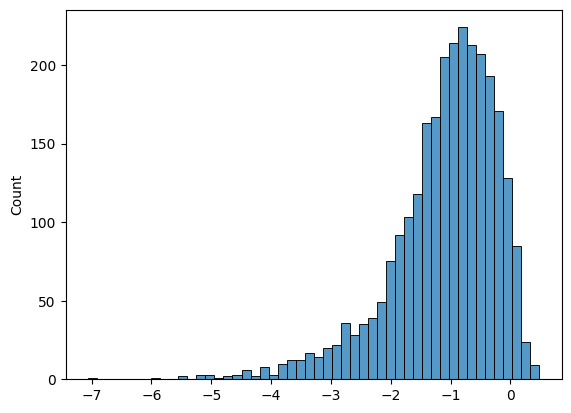

In [116]:
sns.histplot(diff[8,5])

In [112]:
diff = torch.load("../results/gpt2_examples_diff.pt")

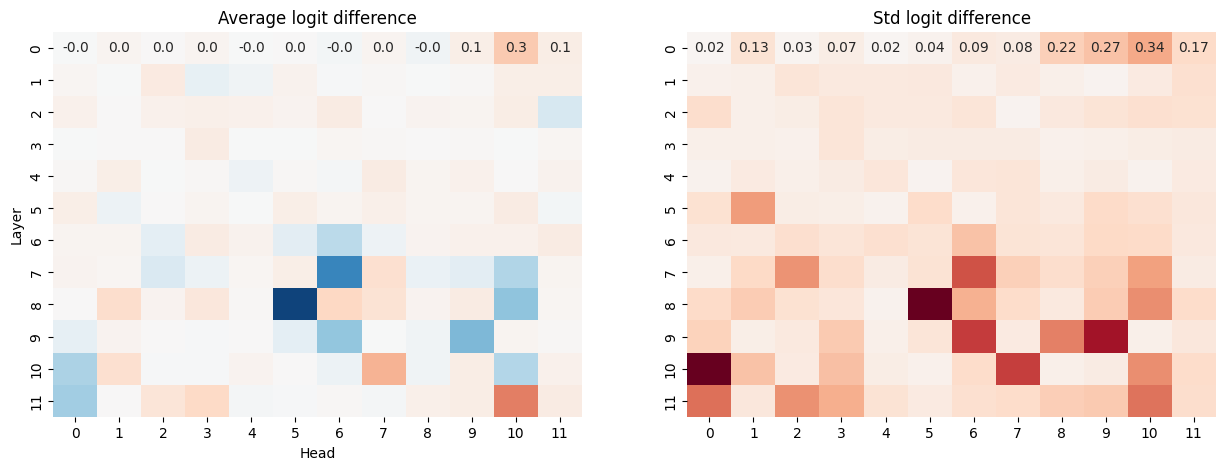

In [5]:
plot_heatmaps(diff.mean(-1), diff.std(-1), title="ciao", interval=1.2)

## Attention pattern

In [3]:
#! TODO : analizzare da dove vengono i valori
pattern = AttentionPattern(dataset,model, 50)

In [34]:
pat = pattern.attention_pattern_all_len()

Attention pattern at len 31:  25%|██▌       | 1/4 [00:00<00:01,  2.39it/s]


╭──────────────────────────── Traceback (most recent call last) ────────────────────────────╮
│                                                                                           │
│ /tmp/ipykernel_8616/838542922.py:1 in <module>                                            │
│                                                                                           │
│ [Errno 2] No such file or directory: '/tmp/ipykernel_8616/838542922.py'                   │
│ /home/francesco/Repository/Competition_of_Mechanisms/notebooks/../src/experiment/attentio │
│ n.py:52 in attention_pattern_all_len                                                      │
│                                                                                           │
│    49 │   │   attention_pattern = {}                                                      │
│    50 │   │   for le in lenghts:                                                          │
│    51 │   │   │   if le != 11:                                                            │
│ ❱  52 │   │   │   │   attention_pattern[le] = self.get_attention_pattern_single_len(le, a │
│    53 │   │                                                                               │
│    54 │   │   result_attn_pattern = torch.cat(list(attention_pattern.values()), dim=0)    │
│    55 │   │   return result_attn_pattern                                                  │
│                                                                                           │
│ /home/francesco/Repository/Competition_of_Mechanisms/notebooks/../src/experiment/attentio │
│ n.py:28 in get_attention_pattern_single_len                                               │
│                                                                                           │
│    25 │   │   # attention_pattern = torch.zeros((self.model.cfg.n_layers, self.model.cfg. │
│    26 │   │   attention_pattern = [[] for _ in range(self.model.cfg.n_layers)]            │
│    27 │   │   for idx, batch in tqdm(enumerate(dataloader), total=num_batches, desc=f"Att │
│ ❱  28 │   │   │   _, cache = self.model.run_with_cache(batch["corrupted_prompts"])        │
│    29 │   │   │   for layer in range(self.model.cfg.n_layers):                            │
│    30 │   │   │   │   pattern = cache["pattern", layer].cpu() # (batch_size, n_heads, len │
│    31 │   │   │   │   attention_pattern[layer].append(pattern) # list of [[(batch_size, n │
│                                                                                           │
│ /home/francesco/anaconda3/envs/torch/lib/python3.10/site-packages/transformer_lens/Hooked │
│ Transformer.py:552 in run_with_cache                                                      │
│                                                                                           │
│    549 │   │   ActivationCache object, with a bunch of useful HookedTransformer specific  │
│    550 │   │   dictionary of activations as in HookedRootModule.                          │
│    551 │   │   """                                                                        │
│ ❱  552 │   │   out, cache_dict = super().run_with_cache(                                  │
│    553 │   │   │   *model_args, remove_batch_dim=remove_batch_dim, **kwargs               │
│    554 │   │   )                                                                          │
│    555 │   │   if return_cache_object:                                                    │
│                                                                                           │
│ /home/francesco/anaconda3/envs/torch/lib/python3.10/site-packages/transformer_lens/hook_p │
│ oints.py:481 in run_with_cache                                                            │
│                                                                                           │
│   478 │   │   │   reset_hooks_end=reset_hooks_end,                                        │
│   479 │   │   │   clear_contexts=clear_contexts,  

In [21]:
pat = pattern.get_attention_pattern_single_len(11, aggregate=True)

Attention pattern at len 11:   0%|          | 0/1 [00:00<?, ?it/s]Attention pattern at len 11: 100%|██████████| 1/1 [00:00<00:00, 49.59it/s]


In [33]:
import circuitsvis as cv
tokens = ["--", "subject_1_1", "subject_1_2", "subject_1_3", "--", "pre", "definition", "post_definition",  "subject_2_1", "subject_2_2", "subject_2_3", "--","last"]
cv.attention.attention_patterns(tokens=tokens, attention=pat.mean(0)[9]) 

╭──────────────────────────── Traceback (most recent call last) ────────────────────────────╮
│                                                                                           │
│ /tmp/ipykernel_8616/2756424338.py:3 in <module>                                           │
│                                                                                           │
│ [Errno 2] No such file or directory: '/tmp/ipykernel_8616/2756424338.py'                  │
╰───────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'pat' is not defined

In [4]:
out = pattern.compute_interaction(5,2, rescale_to_standard=False, max_min_rescale=False, return_full_output=True)
print(out.mean(0))
print(out.std(0))


plot_interaction(out)

Interaction matrix at len 25:   0%|          | 0/2 [00:00<?, ?it/s]

Interaction matrix at len 39: 100%|██████████| 1/1 [00:00<00:00, 53.47it/s]


tensor([[ 3.1721, -2.2707, -4.3734,  ...,  2.6255, -1.0733, -2.0121],
        [ 3.0943, -2.3481, -4.4551,  ...,  2.2859, -1.1717, -2.1098]])
tensor([[1.1845, 1.1402, 1.2308,  ..., 2.3683, 1.4782, 1.0774],
        [1.2929, 1.1494, 1.3065,  ..., 2.3515, 1.4705, 1.1905]])


In [4]:
batch = pattern.get_batch(25)

In [66]:
batch = pattern.get_batch(25)
out = pattern.get_ov_interaction(5,1, batch["target"], return_full_output=True).cpu()

╭──────────────────────────── Traceback (most recent call last) ────────────────────────────╮
│                                                                                           │
│ /tmp/ipykernel_19489/1213447528.py:2 in <module>                                          │
│                                                                                           │
│ [Errno 2] No such file or directory: '/tmp/ipykernel_19489/1213447528.py'                 │
│ /home/francesco/Repository/Competition_of_Mechanisms/notebooks/../src/experiment/attentio │
│ n.py:135 in get_ov_interaction                                                            │
│                                                                                           │
│   132 │   │   (1,0) -> how is affected the mem token if attend to the copy token (after M │
│   133 │   │   (1,1) -> how is affected the copy token if attend to the copy token (after  │
│   134 │   │   """                                                                         │
│ ❱ 135 │   │   print(self.model.to_string(batch["target"]))                                │
│   136 │   │   target = deepcopy(batch["target"])                                          │
│   137 │   │   input_target = deepcopy(batch["target"])                                    │
│   138 │   │   input_target[:,0] = self.model.to_tokens(batch["corrupted_prompts"])[:,5]   │
╰───────────────────────────────────────────────────────────────────────────────────────────╯
IndexError: too many indices for tensor of dimension 2

In [4]:
batch = pattern.get_batch(27)

In [60]:
out = pattern.get_ov_interaction(9,10, batch, mlp=True, return_full_output=True).cpu()
print([model.to_string(x) for x in out[1,0,:].topk(10, dim=-1).indices])
print(model.to_string(out[1,1,:].topk(10, dim=-1).indices))

[' Russian French', ' German Russian', ' Russian English', ' Ferrari Honda', ' Berlin Florence', ' Russia Chile', ' Munich Ankara', ' Japan India', ' Samsung Google', ' Japan Spain', ' Japan Switzerland', ' IBM Apple', ' Japan Mexico', ' Paris London', ' Japan Poland', ' Japan Canada', ' Samsung Google', ' Boeing Ferrari', ' Japan Germany', ' Russian French', ' Japan India', ' Germany Finland', ' Japan France', ' Japan Belgium', ' Islam Buddhism', ' German Spanish', ' Jerusalem London', ' Moscow Cleveland', ' psychology sociology', ' Japan Romania', ' Japan Italy', ' Finland Rwanda', ' India Germany', ' Chicago Philadelphia', ' Intel Yahoo', ' Poland Austria', ' Japan England', ' Rome Dublin', ' Toyota Volvo', ' Japan Denmark', ' India Nigeria', ' London Moscow', ' Chrysler Fiat', ' Japan Taiwan', ' Berlin Kabul', ' Honduras Japan', ' India Belarus', ' India Spain', ' Latin Spanish', ' Japan Belgium']
[' Y French', ' Ze Russian', ' The English', ' Ferrari Honda', ' Friedrich Florence',

In [ ]:
diff = pattern.compute_interaction(11,5, return_difference=True, random=False, from_resid=True)
print(diff.mean(0), diff.std(0))

In [6]:
batch = pattern.get_batch(27)

tensor(-1.6927)
tensor(-2.0288)


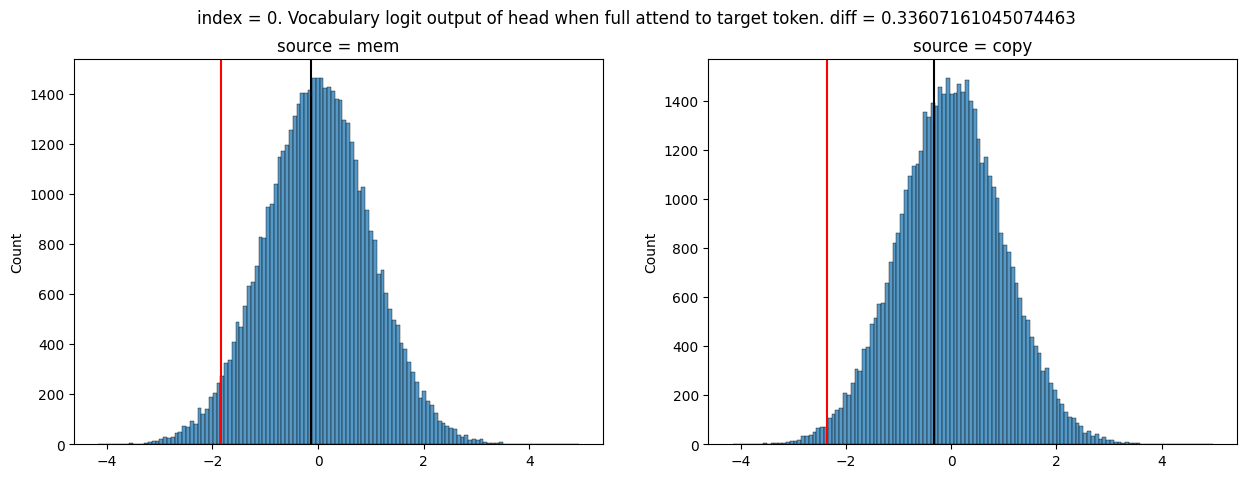

tensor(-0.5885)
tensor(-0.4457)


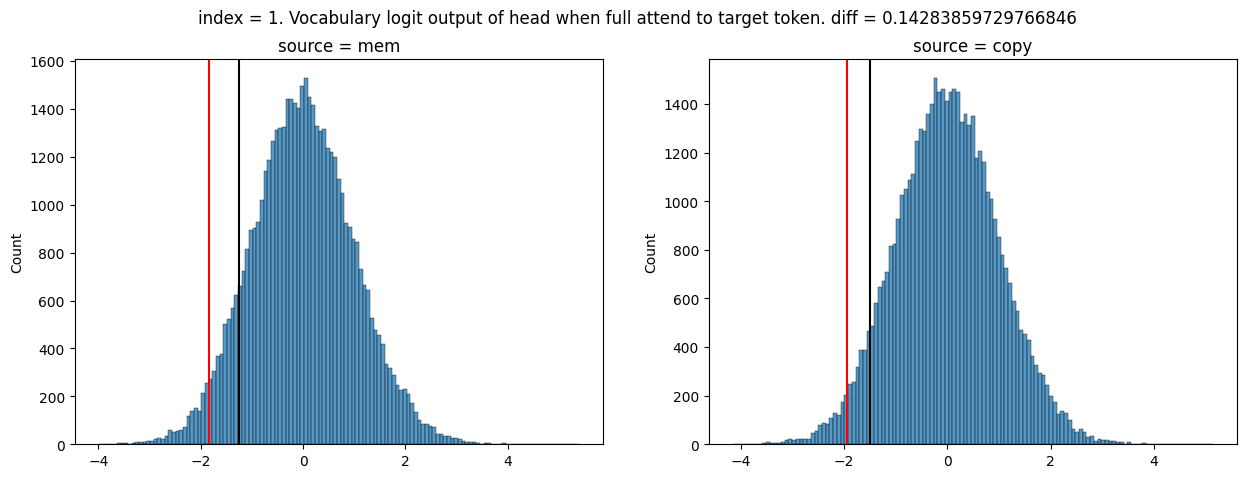

tensor(-0.4509)
tensor(0.4276)


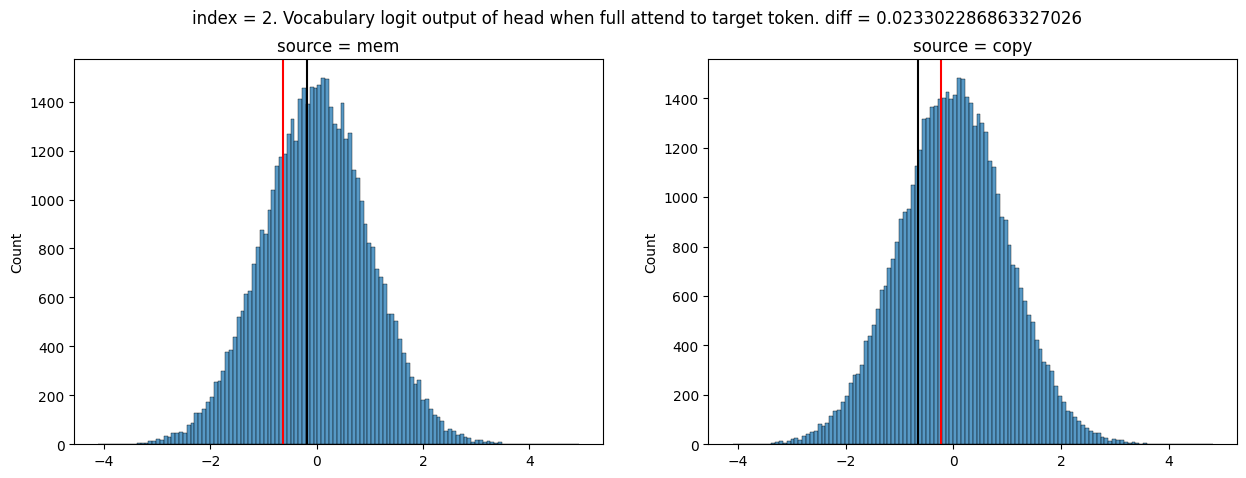

tensor(0.3687)
tensor(-0.1399)


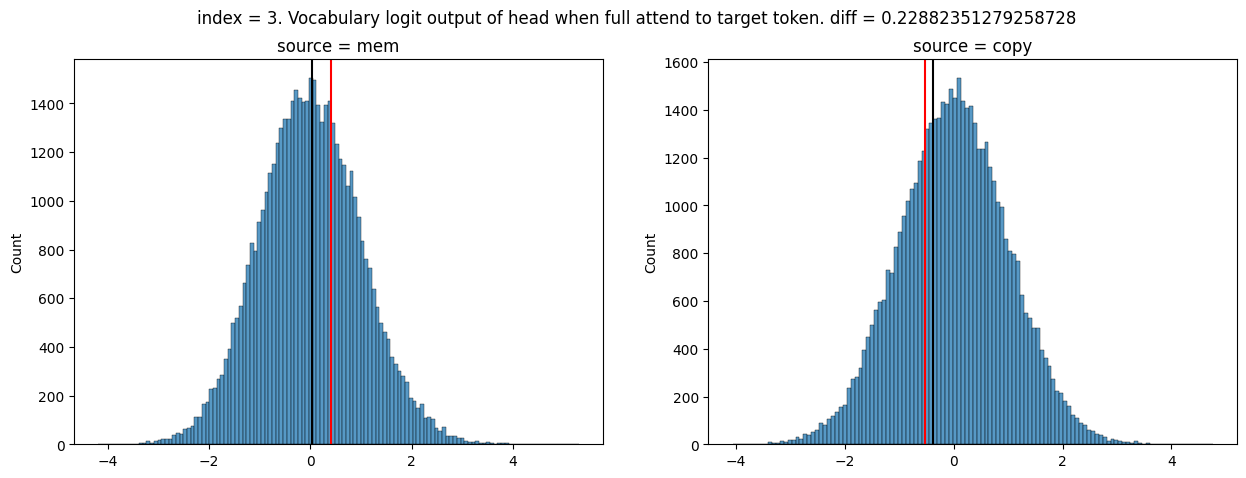

tensor(-0.2099)
tensor(-0.5176)


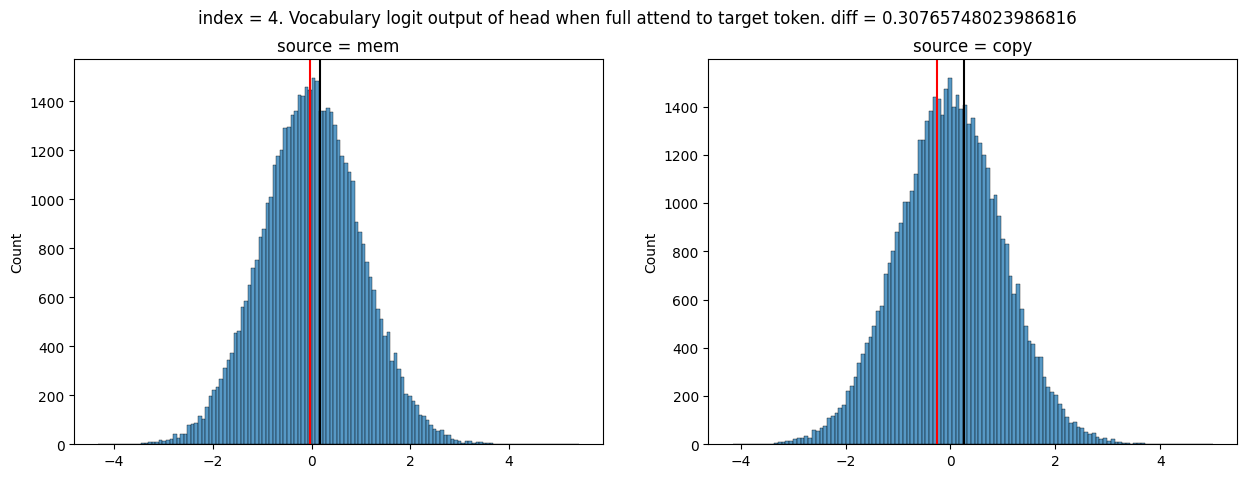

tensor(0.3681)
tensor(0.7030)


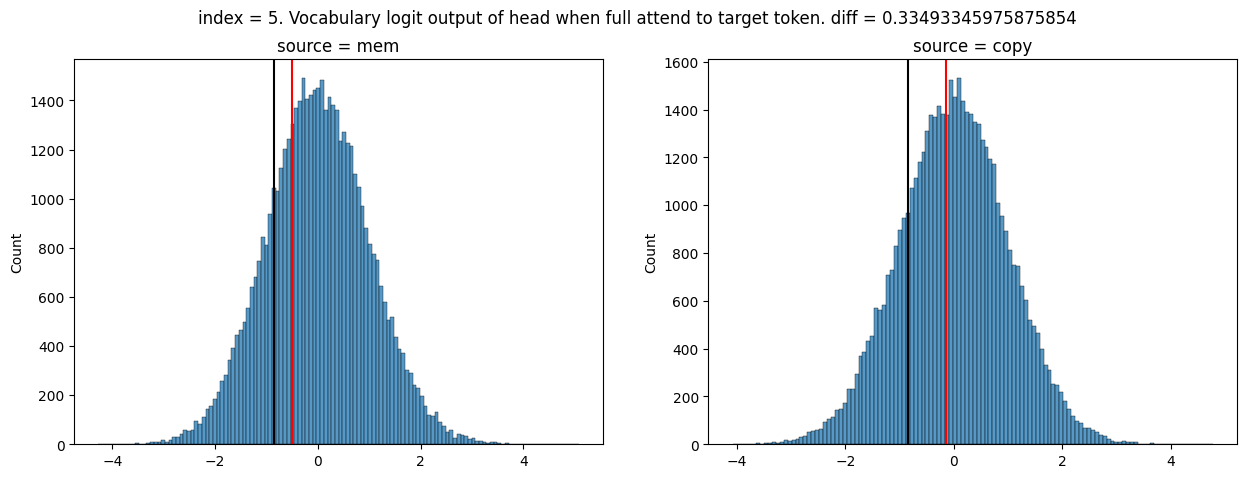

tensor(0.6715)
tensor(0.9421)


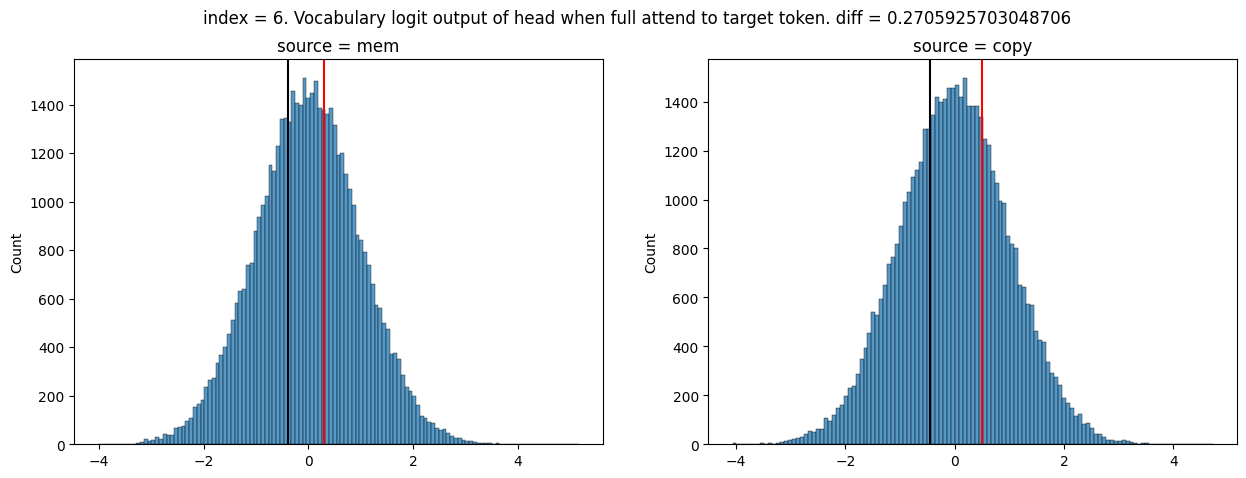

tensor(0.1039)
tensor(-0.1727)


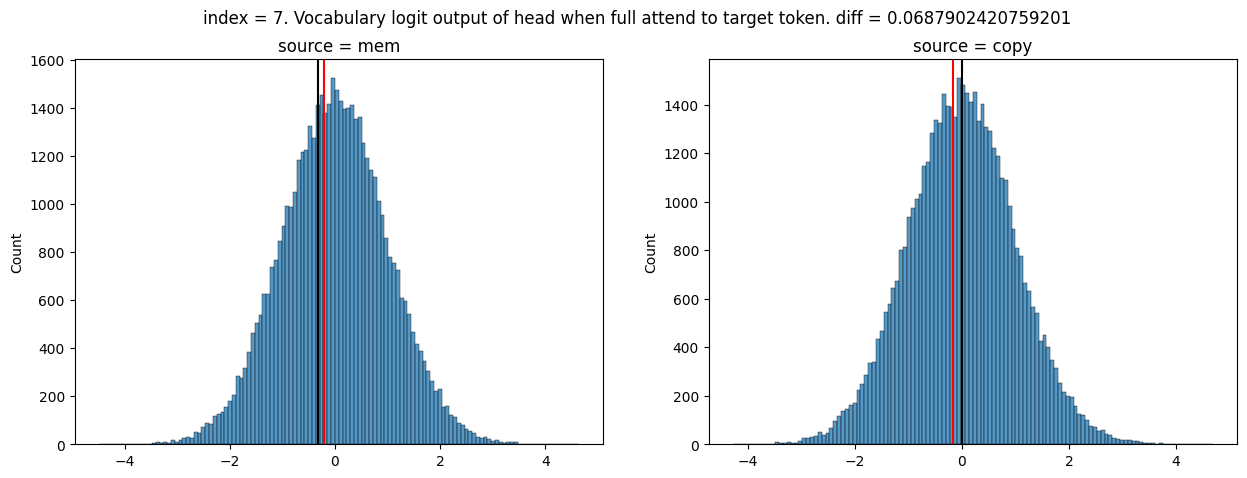

tensor(-0.7147)
tensor(-0.7562)


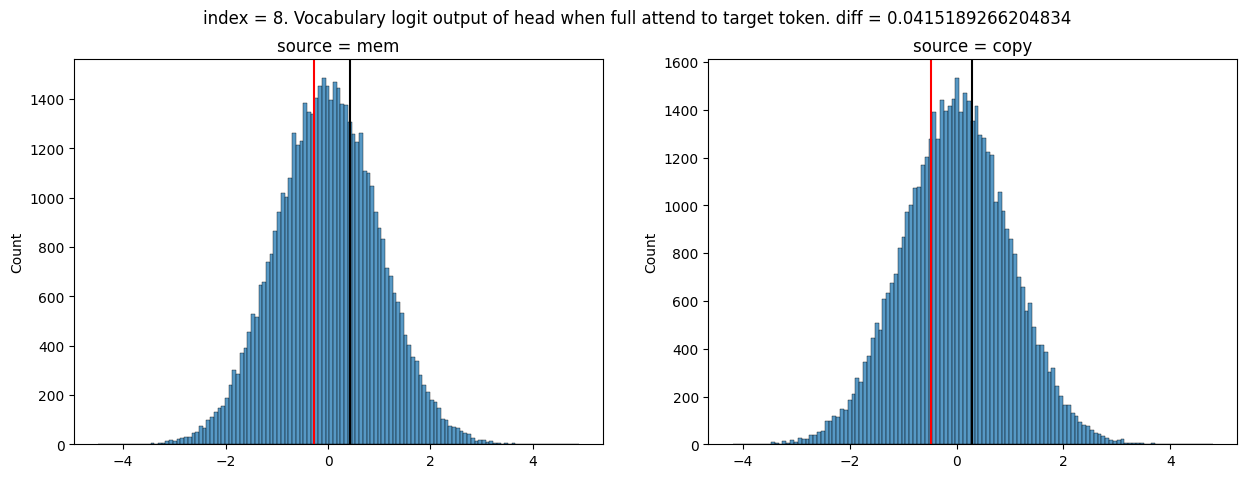

tensor(-0.9042)
tensor(-0.8487)


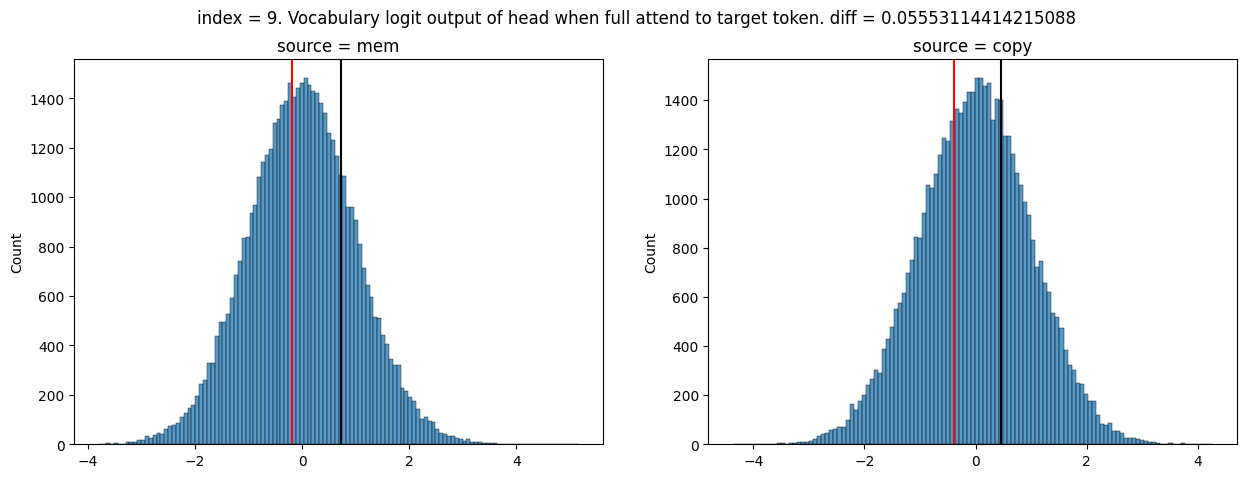

tensor(-0.2785)
tensor(-0.0556)


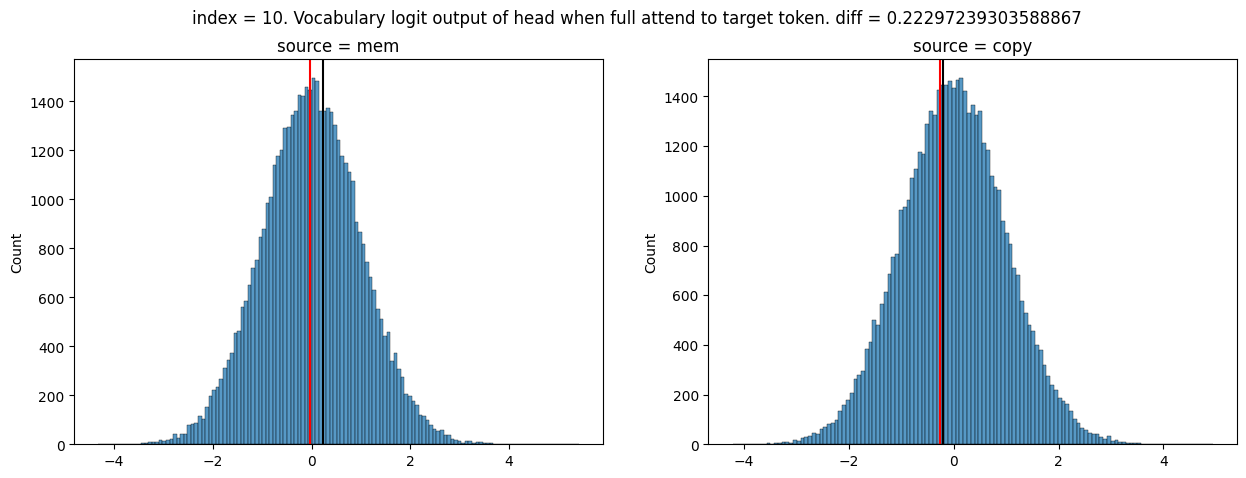

tensor(0.1038)
tensor(-0.4007)


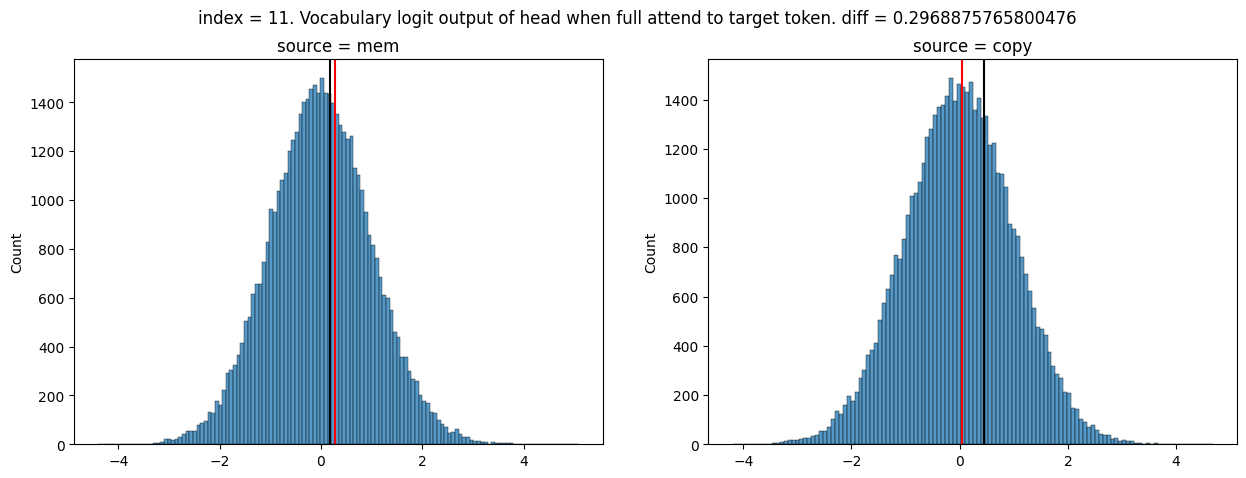

tensor(0.5395)
tensor(0.0760)


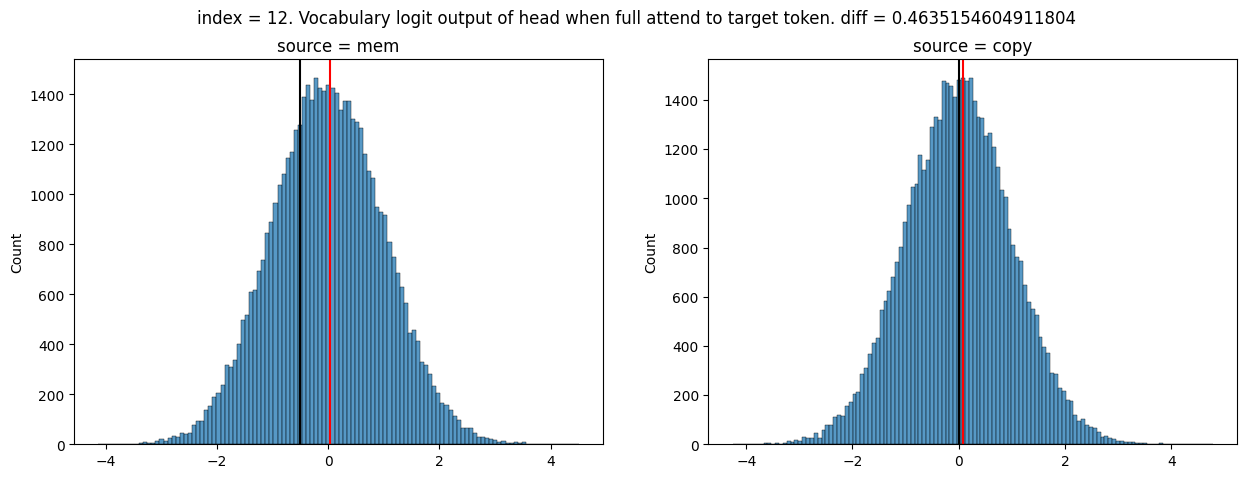

tensor(-1.4919)
tensor(-1.1686)


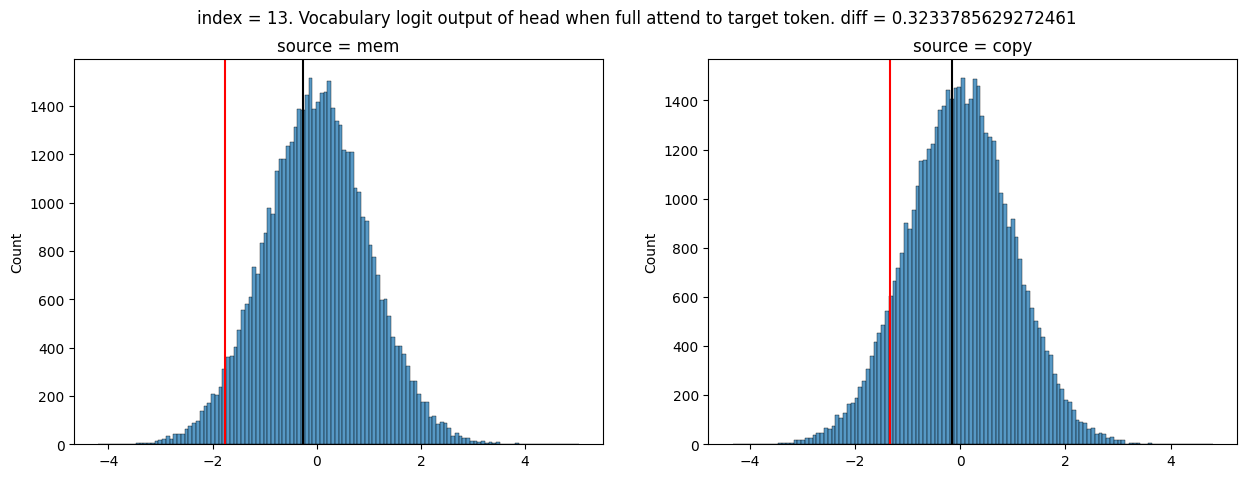

tensor(0.0477)
tensor(0.3242)


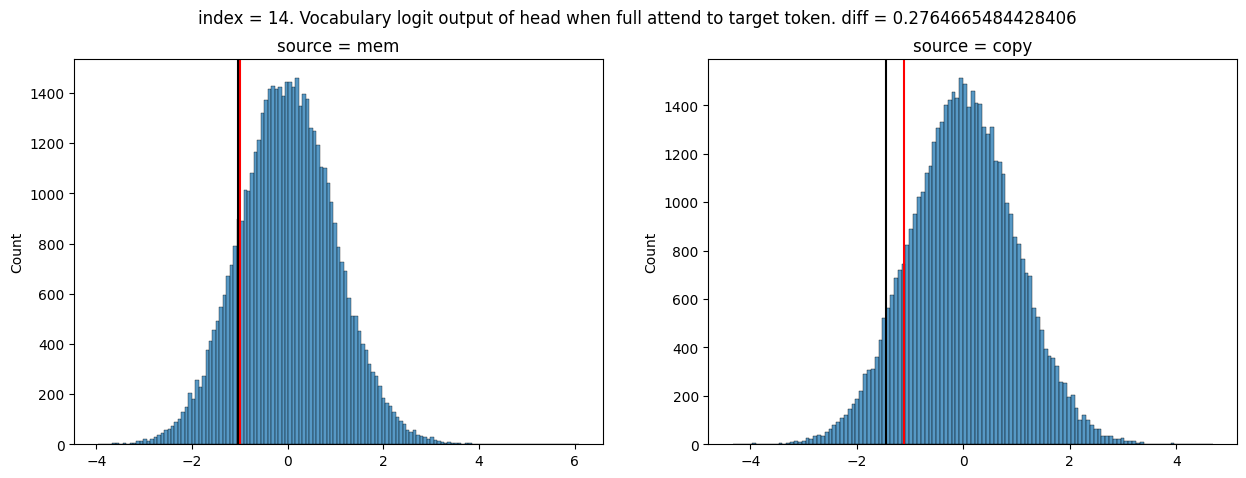

tensor(-0.3361)
tensor(-0.9665)


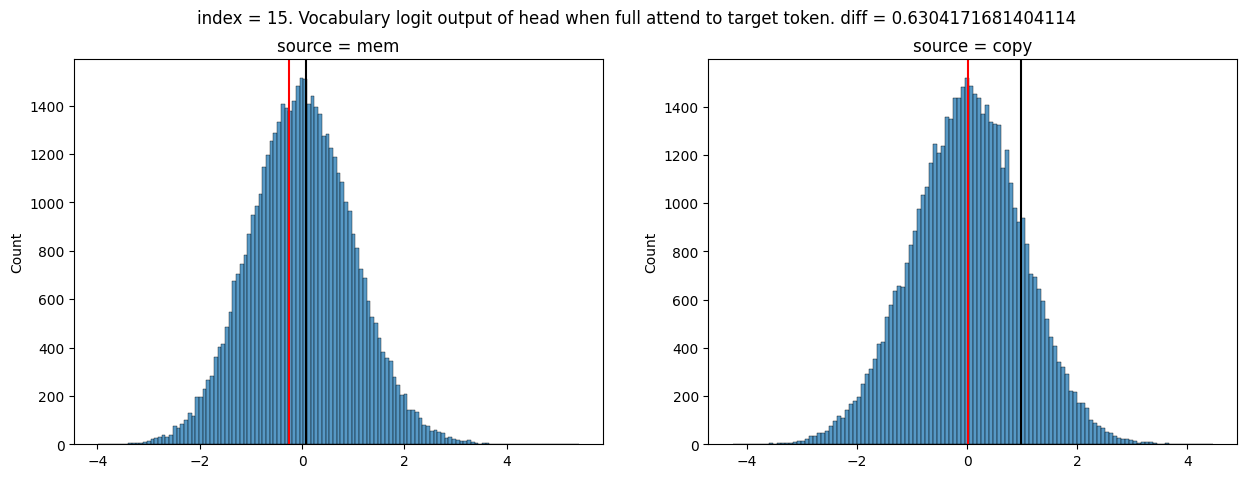

tensor(0.2136)
tensor(-0.2462)


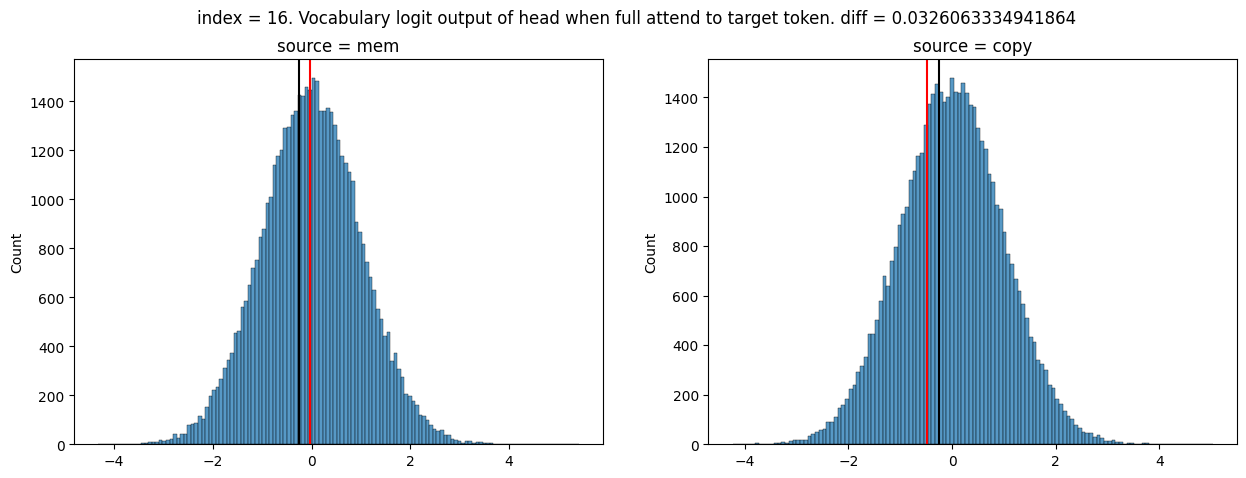

tensor(-0.4993)
tensor(-0.9898)


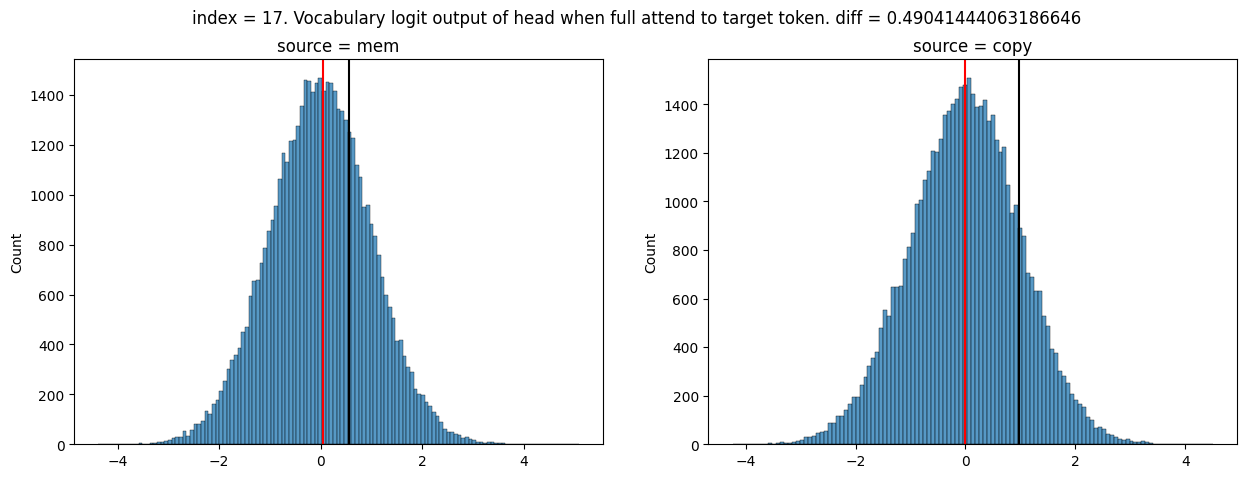

tensor(0.3693)
tensor(0.4406)


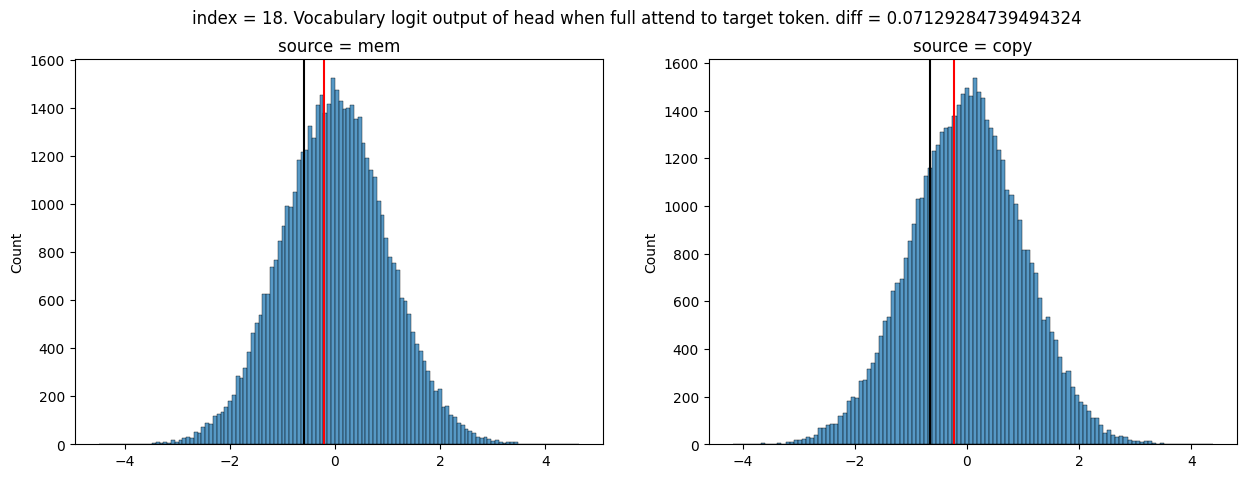

tensor(0.9837)
tensor(0.4342)


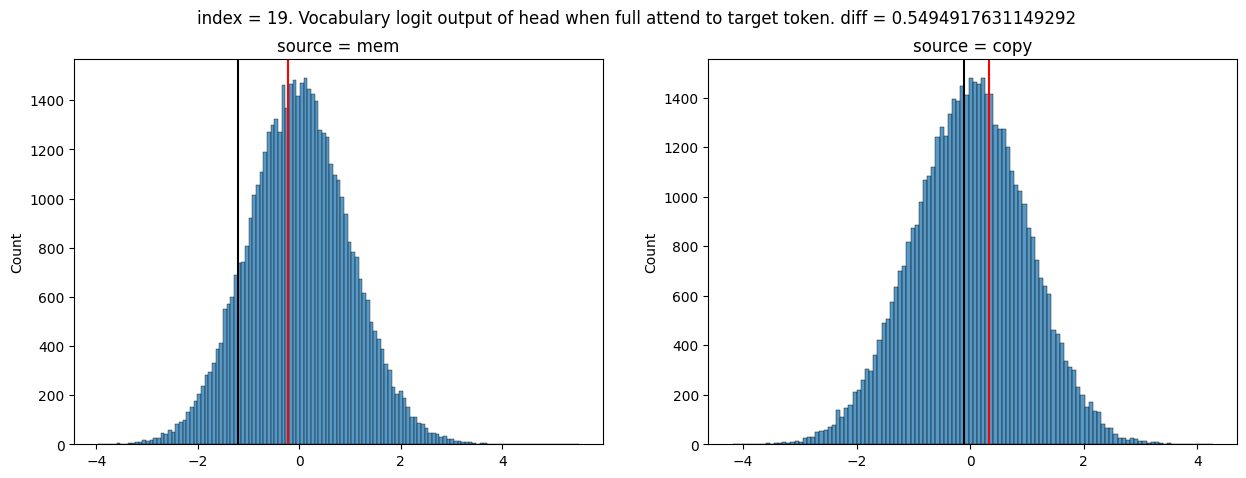

tensor(-0.0561)
tensor(0.2661)


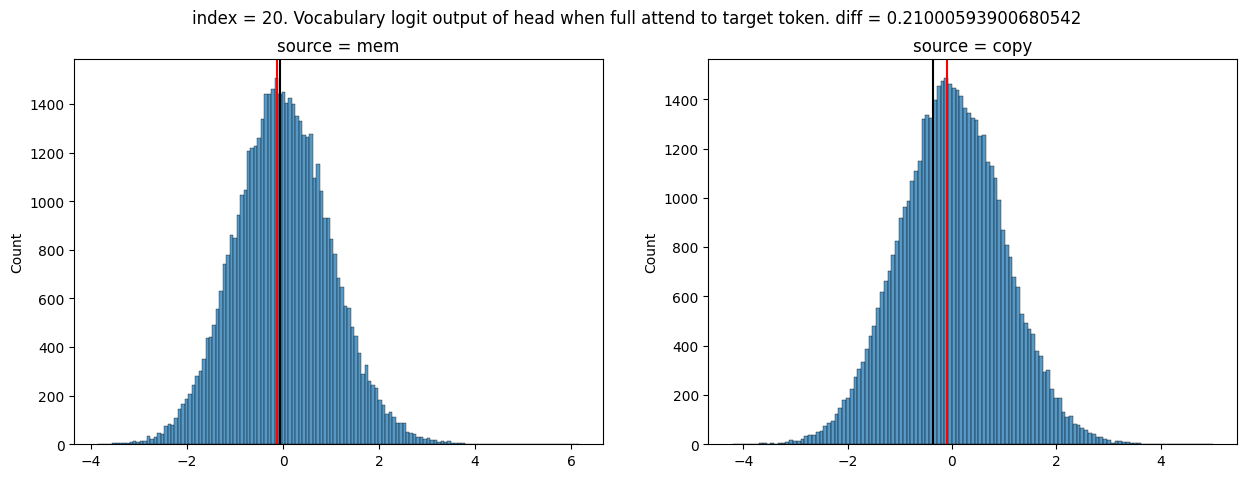

tensor(-0.4954)
tensor(-0.6362)


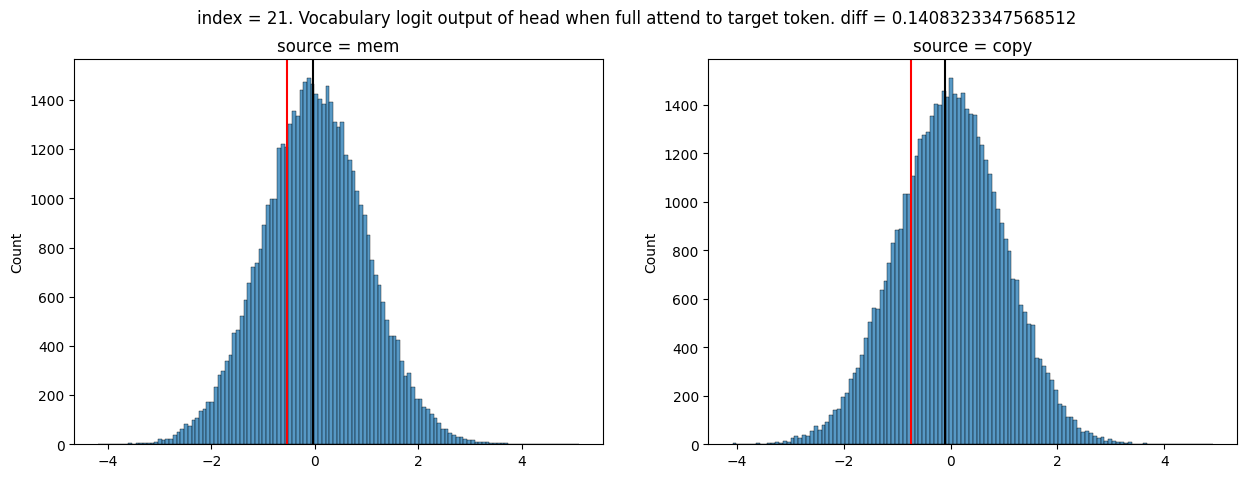

tensor(-0.2497)
tensor(-0.0673)


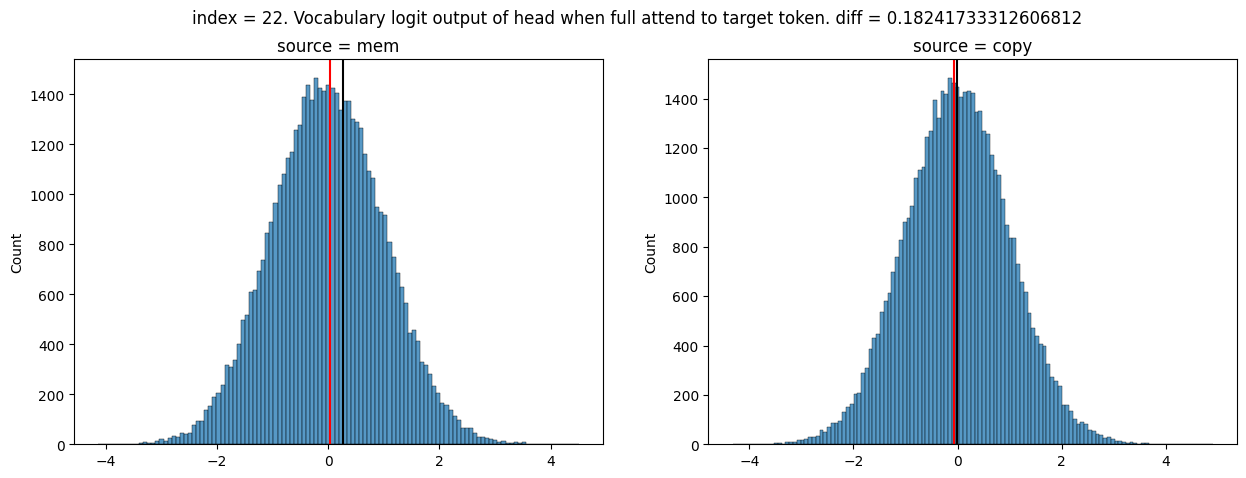

tensor(-0.6449)
tensor(-0.4582)


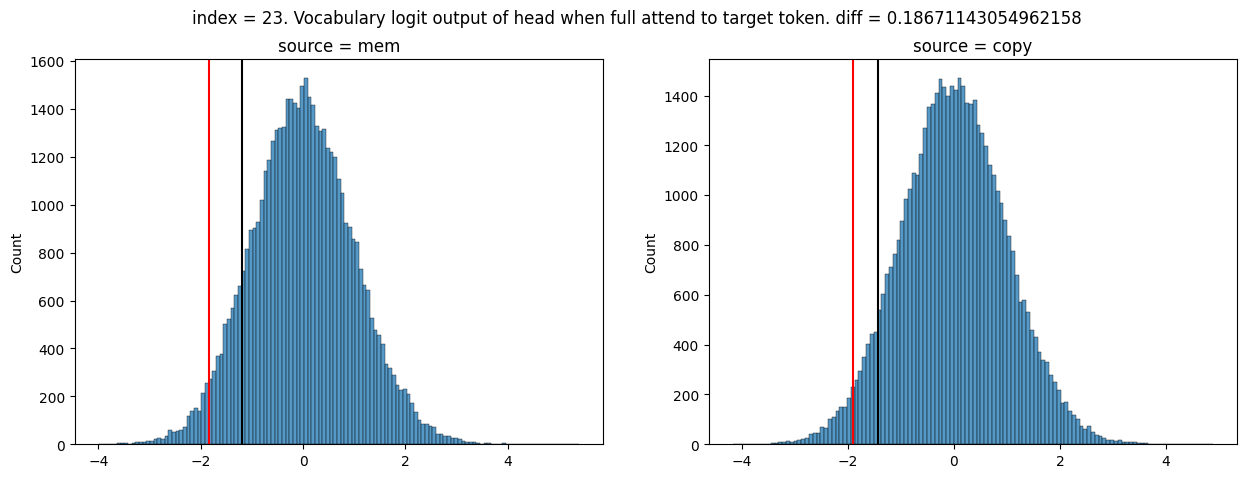

tensor(-0.1086)
tensor(-0.4202)


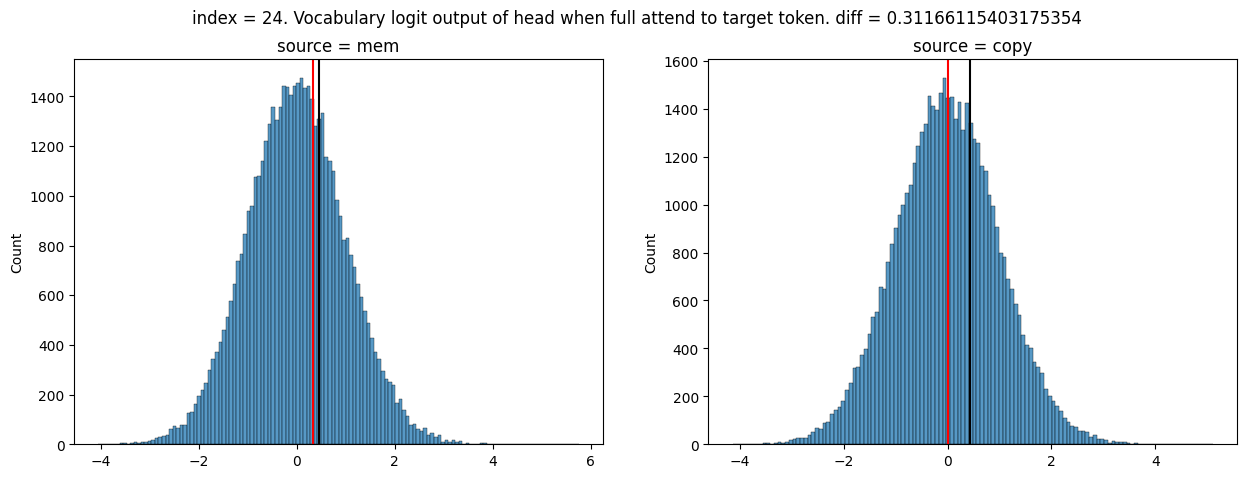

In [11]:

# out = pattern.compute_interaction_per_len(27, 8,5, mlp=True, from_resid=True, return_full_output=True, return_difference=False).cpu()
# diff = pattern.compute_interaction_per_len(27, 8,5, mlp=True, from_resid=True, return_full_output=False, return_difference=True).cpu().squeeze()
_, cache = model.run_with_cache(batch["corrupted_prompts"])
for index in range(25):
    # fig, axes = plt.subplots(1,2, figsize=(15,5))
    # source = 0
    # mlp_out = model.blocks[0].mlp(model.to_tokens(batch["corrupted_prompts"])[index,5].unsqueeze(0).unsqueeze(0).unsqueeze(0))
    # logit = torch.matmul(model.W_U.T, mlp_out.squeeze(0).squeeze(0)).argmax(-1)
    # print(logit.shape)
    # print(mlp_out.shape)
    # base_distribution = model.ln_final(torch.matmul(model.W_U.T, mlp_out.squeeze(0).squeeze(0))) 
    # sns.histplot(base_distribution.cpu(), ax=axes[0])
    # axes[0].axvline(base_distribution[batch["target"][index][0]].cpu(), color="red")
    # axes[0].axvline(base_distribution[batch["target"][index][1]].cpu(), color="black")
    # axes[0].axvline(base_distribution[logit].cpu(), color="orange")
    
    # source = 1
    # mlp_out = model.blocks[0].mlp(model.W_E[batch["target"][index][source]].unsqueeze(0).unsqueeze(0))
    # print(mlp_out.shape)
    # base_distribution = model.ln_final(torch.matmul(model.W_U.T, mlp_out.squeeze(0).squeeze(0))) 
    # sns.histplot(base_distribution.cpu(), ax=axes[1])
    # axes[1].axvline(base_distribution[batch["target"][index][0]].cpu(), color="red")
    # axes[1].axvline(base_distribution[batch["target"][index][1]].cpu(), color="black")
    
    # fig.suptitle("Base distribution")
    # plt.show()
    residual_stream = cache["resid_pre", 4] # (batch, len, d_model)
    residual_target = torch.stack([residual_stream[:,5,:], residual_stream[:,batch["obj_pos"][0],:]], dim=1)
    out = pattern.get_ov_interaction(4,5, batch, mlp=True, residual_stream=residual_target, return_full_output=True).cpu()
    diff = pattern.get_ov_interaction(4,5, batch, mlp=True, residual_stream=residual_target, return_full_output=False, return_difference=True).cpu().squeeze()
    
    
    fig, axes = plt.subplots(1,2, figsize=(15,5))
    source = 0
    sns.histplot(out[index,source,:], ax=axes[0])
    axes[0].axvline(out[index,source,batch["target"][index][0]], color="red")
    axes[0].axvline(out[index,source,batch["target"][index][1]], color="black")
    # axes[0].axvline(base_distribution[model.to_tokens(batch["corrupted_prompts"])[index,5]].cpu(), color="green") 
    axes[0].set_title("source = mem")
    print(out[index,source,batch["target"][index][0]] - out[index,source,batch["target"][index][1]])
    

    source = 1
    sns.histplot(out[index,source,:], ax=axes[1])
    axes[1].axvline(out[index,source,batch["target"][index][0]], color="red")
    axes[1].axvline(out[index,source,batch["target"][index][1]], color="black")
    axes[1].set_title("source = copy")
    print(out[index,source,batch["target"][index][0]] - out[index,source,batch["target"][index][1]])
    fig.suptitle(f"index = {index}. Vocabulary logit output of head when full attend to target token. diff = {diff[index]}")
    plt.show()

In [31]:
base_distribution.shape

torch.Size([50257])

In [5]:
print(out.shape)
import seaborn as sns
# Create a 2x2 subplot
def plot_interaction(out):
    fig, axes = plt.subplots(2, 2, figsize=(8, 6))

    # Plotting each histogram in a separate subplot
    sns.histplot(out[:, 0, 0].cpu(), bins=100, ax=axes[0, 0], kde=True)
    sns.histplot(out[:, 0, 1].cpu(), bins=100, ax=axes[0, 1],  kde=True)
    sns.histplot(out[:, 1, 0].cpu(), bins=100, ax=axes[1, 0],  kde=True)
    sns.histplot(out[:, 1, 1].cpu(), bins=100, ax=axes[1, 1],  kde=True)

    # Adding titles for each subplot
    axes[0, 0].set_title('Histogram of out[:, 0, 0]')
    axes[0, 1].set_title('Histogram of out[:, 0, 1]')
    axes[1, 0].set_title('Histogram of out[:, 1, 0]')
    axes[1, 1].set_title('Histogram of out[:, 1, 1]')

    # Adjust layout for better display
    plt.tight_layout()

    plt.show()

torch.Size([9999, 2, 2])


tensor(0.4114)


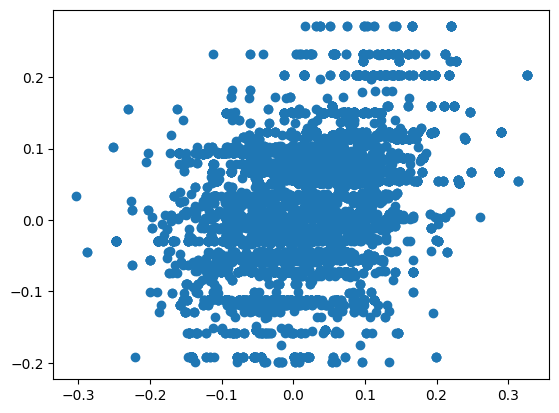

In [56]:
#plot correlation between out[:,0,1] and out[:,1,0]

from torchmetrics import PearsonCorrCoef


plt.scatter(out[:,1,0].cpu(), out[:,0,0].cpu())
#print pearson correlation
print(PearsonCorrCoef()(out[:,1,0].cpu(), out[:,0,0].cpu()))
